<a href="https://colab.research.google.com/github/ishan05sharma/inpainting/blob/main/Image_Inpainting_openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#Importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [48]:
img = cv2.imread("/content/Test.png", 1) #reading image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converting to  - needed color space
mask = np.zeros(img.shape, dtype=np.uint8) #generating a binary image using numpy
mask = cv2.circle(mask, (int(img.shape[0]/2),int(img.shape[1]/2)), 50, (255,255,255), -1) #drawing a circular mask on the binary image
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB) #converting to  - needed color space

damaged_img = cv2.bitwise_or(img, mask) #bitwise operator to merge img and mask

mask,_,_ = cv2.split(mask) #converting mask from 3 channel space to 1 channel space
print(mask.shape) #checking if channel conversion is done or no

(1080, 1080)


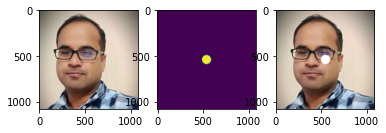

In [49]:
#Displaying  input images 
input = [img, mask, damaged_img]
for i in range(3):
  plt.subplot(1,3, i+1)
  plt.imshow(input[i])

plt.show()  

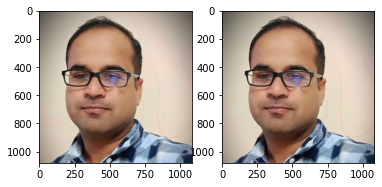

In [50]:
#Using 2 inpainting algorithms - papers mentioned in next cell 
corrected_img1 = cv2.inpaint(damaged_img, mask, 5, cv2.INPAINT_NS)
corrected_img2 = cv2.inpaint(damaged_img, mask, 5, cv2.INPAINT_TELEA)

#outputting both the results
output = [corrected_img1, corrected_img2]
for i in range(2):
  plt.subplot(1,2, i+1)
  plt.imshow(output[i])

plt.show() 

In [ ]:
#RESEATCH PAPER LINKS - both are quite old though

# Talea(2004): http://www.howardzzh.com/research/papers/vision/2004.JGT.Telea.ImageInpainting.pdf
# NS(2001) https://www.math.ucla.edu/~bertozzi/papers/cvpr01.pdf 